# Variable Types and Continuous Probability

In the previous lesson, we looked at _discrete_, and particularly _categorical_, probablity distributions.  In this lesson, we're going to talk about more types of variables, and continuous probability distributions.

Let's grab that NYC data again.

In [1]:
library(tidyverse)
library(nycflights13)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
options(repr.matrix.max.rows=20, repr.plot.height=4.5)

## Types of Variables

We can categorize random variables (or observations, or parameters) into four types:

1. **Categorical** variables take on distinct values with no relationship between different values.  Origin airport and airline from the previous example are both categorical variables.
2. **Ordinal** variables take on distinct, _ordered_ values.  For example, if we describe rain intensity as ‘none’, ‘light’, ‘moderate’, and ‘heavy’, that is ordinal: the values are distinct, but are ordered in increasing amounts of rainfall.  Likert-style survey responses (‘disagree’, ‘agree’, ‘strongly agree’) are a common kind of ordinal data.
3. **Cardinal** variables take on distinct ordered values that support basic math (particularly subtraction).  The most common example is integers, commonly expressing counts: if we count the number of airplanes, we can compare two counts by subtracting them; we can't, however, say anything numeric about the difference between ‘moderate’ and ‘light’ rainfall.
4. **Continuous** variables have values that are real numbers - there are infinitely many possible values, even if the range is limited, and for any two different values observed, it would be possible to have a value between them; further, they support all of our usual mathematical operations.  But thinking of these as real numbers is the right thing to do.  Non-count measurements are typically continuous.

Types 1–3 are all types of **discrete** values: they take on distinct values.  Type 4 is just **continuous**.

## Continuous Variables

In the previous demo, we counted up the number of flights by a particular airline, or from a particular airport, to estimate probabilities.

The NYC data also includes weather for each of the airports.  Let's look at that data:

In [3]:
head(weather)

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
EWR,2013,1,1,0,37.04,21.92,53.97,230,10.35702,11.91865,0,1013.9,10,2013-01-01 01:00:00
EWR,2013,1,1,1,37.04,21.92,53.97,230,13.80936,15.89154,0,1013.0,10,2013-01-01 02:00:00
EWR,2013,1,1,2,37.94,21.92,52.09,230,12.65858,14.56724,0,1012.6,10,2013-01-01 03:00:00
EWR,2013,1,1,3,37.94,23.00,54.51,230,13.80936,15.89154,0,1012.7,10,2013-01-01 04:00:00
EWR,2013,1,1,4,37.94,24.08,57.04,240,14.96014,17.21583,0,1012.8,10,2013-01-01 05:00:00
EWR,2013,1,1,6,39.02,26.06,59.37,270,10.35702,11.91865,0,1012.0,10,2013-01-01 07:00:00


Dealing with weather by the hour seems a little obnoxious; let's bin it by day.

In [4]:
day_weather = weather %>%
    group_by(origin, year, month, day) %>%
    summarize(avg_temp=mean(temp, na.rm=TRUE), max_temp=max(temp), min_temp=min(temp),
              avg_wind=mean(wind_speed), max_wind=max(wind_gust),
              precip=sum(precip))
head(day_weather)

origin,year,month,day,avg_temp,max_temp,min_temp,avg_wind,max_wind,precip
EWR,2013,1,1,38.4800,41.00,33.98,12.758648,18.54012,0
EWR,2013,1,2,28.8350,33.98,24.08,12.514732,21.18871,0
EWR,2013,1,3,29.4575,33.98,26.06,7.863663,13.24295,0
EWR,2013,1,4,33.4775,39.92,28.94,13.857309,27.81019,0
EWR,2013,1,5,36.7325,44.06,32.00,10.836512,21.18871,0
EWR,2013,1,6,37.9700,48.02,32.00,8.007511,17.21583,0


Let's try to count up average temperatures:

In [5]:
avg_temps = day_weather %>%
    filter(origin == 'EWR') %>%
    group_by(avg_temp) %>%
    summarize(ndays=n()) %>%
    ungroup() %>%
    mutate(prob=ndays / sum(ndays))
avg_temps

avg_temp,ndays,prob
15.49250,1,0.002747253
17.67500,1,0.002747253
17.84750,1,0.002747253
20.11250,1,0.002747253
23.27000,1,0.002747253
24.62750,1,0.002747253
25.07750,1,0.002747253
25.14435,1,0.002747253
25.42250,1,0.002747253
25.46750,1,0.002747253


Individual temperatures are not very common!   Further, what if we want the probability that it will be 82 degrees?

In [6]:
avg_temps %>% filter(avg_temp == 82)

avg_temp,ndays,prob


No entries!  But what if we plot the distribution of average temps?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


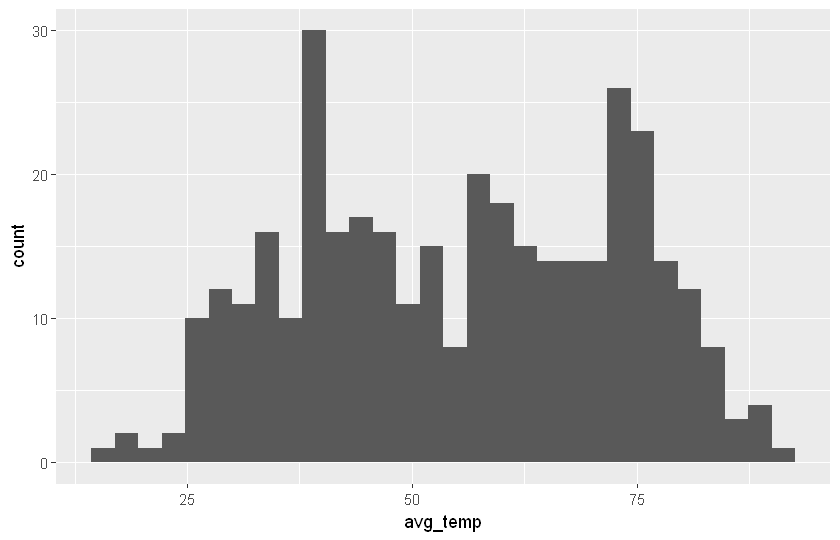

In [7]:
ggplot(day_weather %>% filter(origin == 'EWR')) +
    aes(x=avg_temp) +
    geom_histogram()

Based on this we'd expect 82 to happen sometimes!

It turns out that, when we have a continuous variable, it isn't meaningful to ask about the probability of it taking on a particular value.  If we think about the infinite possibilities, we can see why: even with a limited variable, such as one that only takes on values in the range $[0,1]$, there are infinitely many different values!  Since the whole probability distribution must sum to 1, each individual value's probability must be infinitely close to 0.

This… does not sound useful.  But it turns out there is a different, related question we can ask.  We _can_ count how many observations have values less than or equal to a particular value!  And we can ask how likely it is to see a value less than or equal to a particular value.

In [8]:
mean(day_weather$avg_temp <= 50)

[1] 0.4166667

In [9]:
mean(day_weather$avg_temp <= 82)

[1] 0.9587912

This is called the **cumulative** probability.  We can also ask about the probability of seeing a value in a particular range by subtracting: $P(a < X \le b)$ = $P(X \le b) - P(X < a)$

In [10]:
mean(day_weather$avg_temp <= 82.5) - mean(day_weather$avg_temp <= 81.5)

[1] 0.01190476

There is a 1.2% chance of a day having an average temperature within 0.5 of 82. Cool!

## Distributions

Counting things up turns out to not be a very friendly way of thinking about continuous probability distributions.  Instead, there are a bunch of standard probability distributions defined with mathematical functions.

One of these is particularly common and important: the _normal_ or _Gaussian_ distribution.  Let's see its CDF:

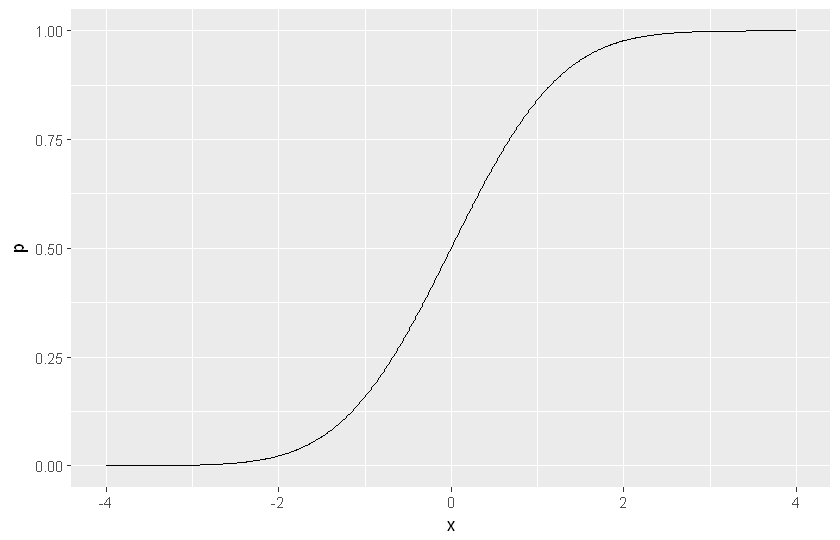

In [11]:
ggplot(data.frame(x=seq(-4, 4, 0.01)) %>% mutate(p=pnorm(x))) +
    aes(x=x, y=p) +
    geom_line()

We describe the cumulative probability with a _cumulative distribution function_, or CDF.  For a CDF $F$ for a random variable $X$, $F(x) = P(X \le x)$.  R supports many probability distributions, and the `p` function like `pnorm` is the cumulative distribution for that distribution.  The CDF of the ‘standard normal’ distribution is

$$F_{\mathrm{norm}}(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} dt$$

A CDF is monotonic — if $x > y$, then $F(x) \ge F(y)$ — and has a minimum of 0 and a maximum of 1.

Cumulative distribution is not the only way we can think of probabilities, though.  This distribution may be more familiar if we look at it like this:

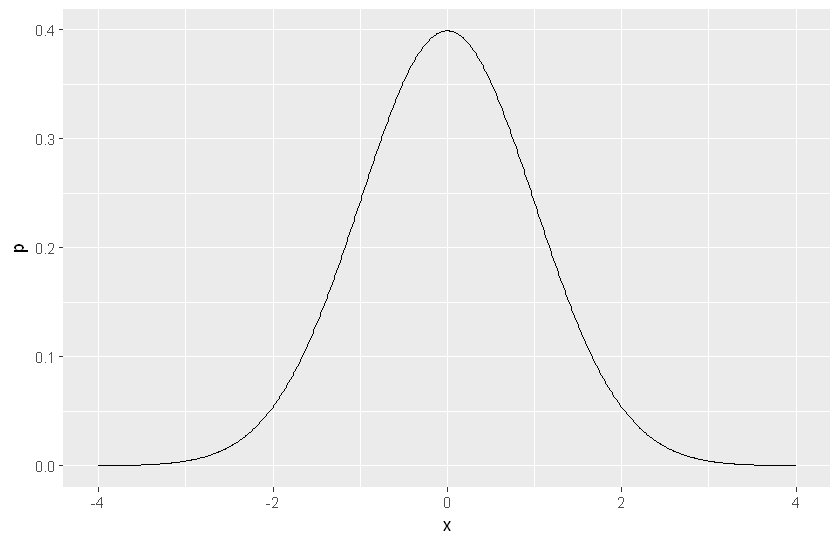

In [12]:
ggplot(data.frame(x=seq(-4, 4, 0.01)) %>% mutate(p=dnorm(x))) +
    aes(x=x, y=p) +
    geom_line()

This is the _probability density function_ (PDF), and it corresponds to the probability distributions we saw in the discrete case.  However, it is important to note that probability densities are **not** probabilities!  CDF values are probabilities, but PDF values are not - they are the density of the probability in a small region surrounding the value.

For a continuous probability distribution, the cumulative function $F$ and density function $D$ have the following relationship:

$$\begin{align*}
D(x) = \frac{d}{dx} F(x) \\
F(x) = \int_{-\infty}^{x} D(t) dt
\end{align*}$$

That is, the probability density is the derivative of the cumulative distribution function.  $D(x)$ indicates how much of the probability gets added at $x$, roughly.  But it is meaningless to ask about $P(X=x)$, as we discussed above, and the probability density can be quite large (greater than 1, even!).  The probability density does, however, integrate to 1.

Many natural phenomena follow normal distributions.  Unfortunately, our weather doesn't quite.  But we can try - let's look at some general statsitics of the weather data:

In [13]:
mean(day_weather$avg_temp)
sd(day_weather$avg_temp)

[1] 55.19904

[1] 17.15807

These are the mean and _standard deviation_ — a measure of how diffuse the values are — of the data.  In its general form, the normal distribution is parameterized by mean and standard distribution, and we can use that to overlay a normal distribution on top of the data:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


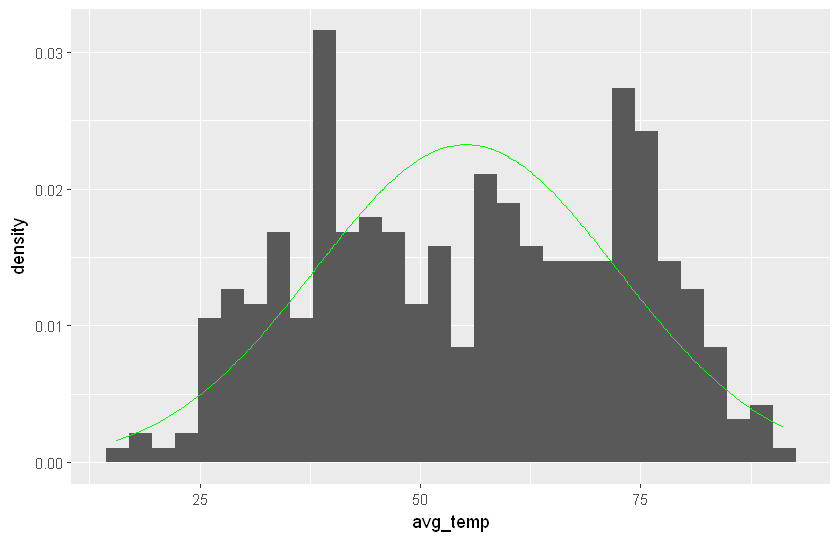

In [14]:
ggplot(day_weather %>% filter(origin == 'EWR')) +
    aes(x=avg_temp) +
    geom_histogram(mapping=aes(y=..density..)) +
    geom_line(mapping=aes(y=dnorm(avg_temp, 55.199, 17.158)), color="green")

Not a great fit, but not abjectly awful.  Many natural processes will follow a normal distribution more or less well.

## R Distribution Functions

Each probability distribution in R has 4 functions:

- `p`, the cumulative distribution function (`p` is for _probability_)
- `d`, the density function
- `q`, the _quantile_ function. This takes a probability and returns the value $x$ such that $F(x) = p$.
- `r`, the function to draw random values

So, for the normal distribution, we have already seen `p` and `d`; with `q`, we can ask for the value at the 75% point:

In [15]:
qnorm(0.75, 0, 1)

[1] 0.6744898

If we have a _standard normal_ variable (its mean is 0 and its standard deviation is 1), we expect 75% of its observed values to be less than or equal to 0.6745.

We can also draw a number of values:

In [16]:
rnorm(10, 0, 1)

[1] -0.1932783  0.8308263  0.2398253 -0.7871805  0.1151798  0.6650832
 [7]  0.3385586  1.4708067 -2.2951772 -1.1478225

We can use this to plot things!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


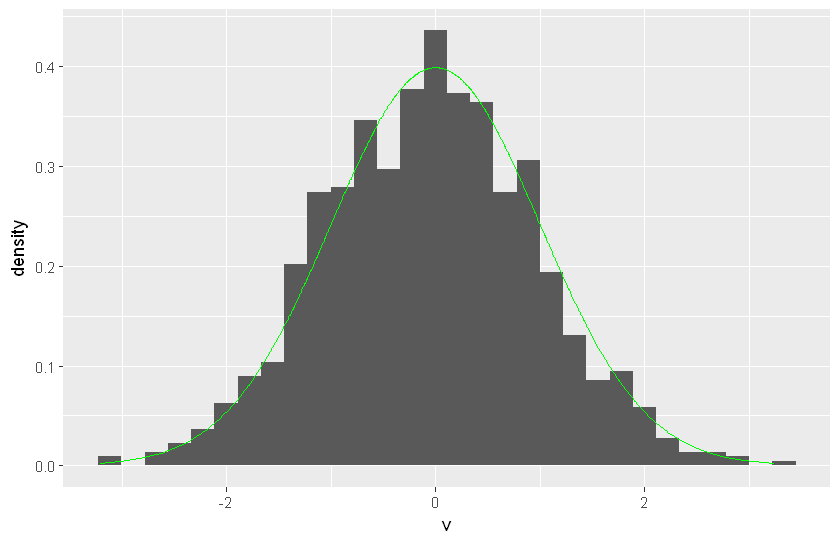

In [17]:
ggplot(data.frame(v=rnorm(1000, 0, 1))) +
    aes(x=v) +
    geom_histogram(mapping = aes(y=..density..)) +
    geom_line(mapping=aes(y=dnorm(v, 0, 1)), color="green")

We can see that our random values are, in fact, distributed as more or less as we would expect.

## Exponential Distributions

The _exponential_ distribution is one of several probability distributions over non-negative integers where most values are small, and values become more likely the larger they get. Here's one exponential CDF:

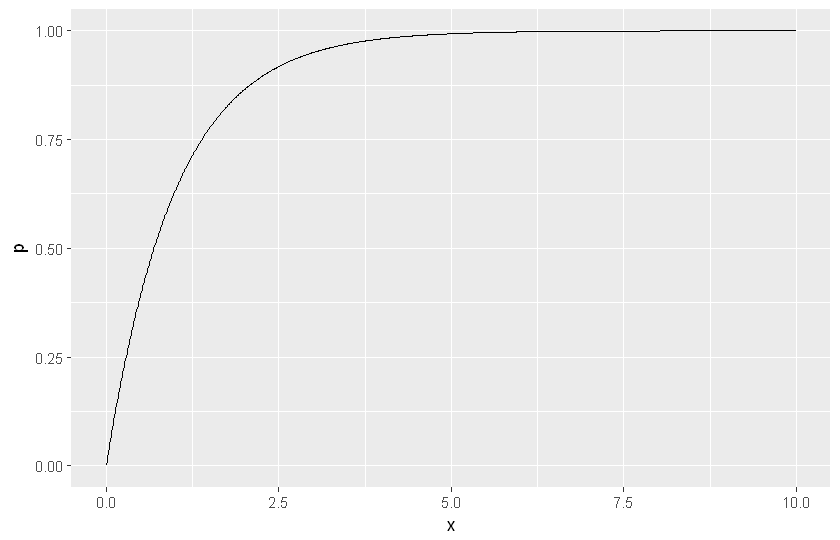

In [18]:
ggplot(data.frame(x=seq(0,10,0.01)) %>% mutate(p=pexp(x, 1))) +
    aes(x=x, y=p) +
    geom_line()

And its PDF:

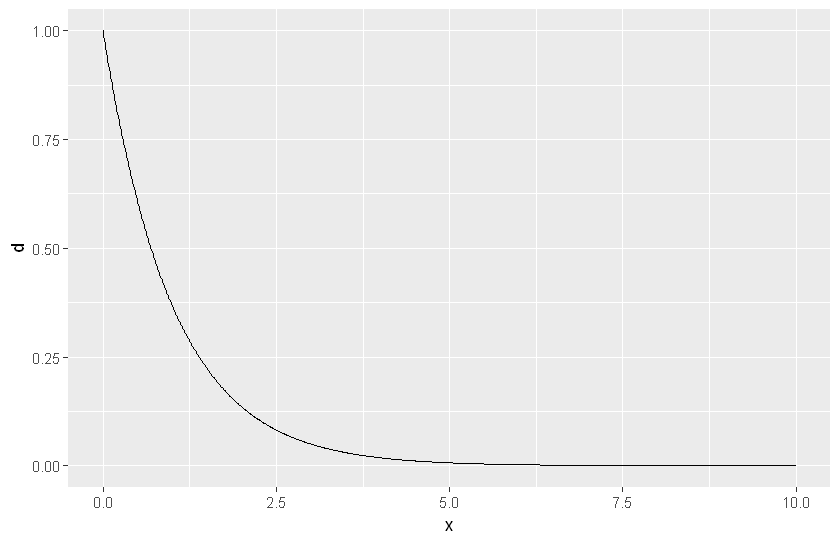

In [19]:
ggplot(data.frame(x=seq(0,10,0.01)) %>% mutate(d=dexp(x, 1))) +
    aes(x=x, y=d) +
    geom_line()